# Compare the best average models in different settings

Contents:

- ## [Develpe](#dev)
- ## [Analysis](#analysis)
    - ### [Random](#random)
    - ### [Subjective Novelty](#sn)
    - ### [Plasticity](#plasticity)
    - ### [Curiosu](#curious)

## Develope <a name="dev"></a>

    Here comes the code

### Imports

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import time
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

import agent

from toolbox import get_word_ix, UniversalConstants, UniversalData, model_best_acc_detector, load_listener_model, load_speaker_model, curiosity

ntokens: 4238


In [2]:
# Required for the functions defined here. They should be imported to toolbox when the function definitions move there.
import numpy as np
from toolbox import load_numpy

In [3]:
import torch.nn as nn
import torch.optim as optim

## Constants

In [4]:
uc = UniversalConstants()
ud = UniversalData()

which_set = 'val'

### Paths

In [5]:
# path to the loss_acc results to choose the best model
path_supervised = os.path.join('/roaming', 'mahmoudi', 'curiosity')
path_unsupervised = os.path.join('/home', 'u1270964', 'curiosity')

## Functions Definition

In [6]:
# This definition should move to toolbox
def best_model_acc(_path_loss_acc, _agent, _setting, which_set, learning, mode='single', avg_setting='w'):
    if _agent == 'listener':
            _agent = 'li'
    elif _agent == 'speaker':
            _agent = 'sp'
    else:
        print("put either listener or speaker for agent.")
    
    if mode == 'single':
        
        _the_best = {'best_seed': 0,
                     'best_ep': 0,
                     'best_acc': 0.0}

        for _seed in uc.final_seeds:
            scores = load_numpy(_path_loss_acc, _agent, which_set, 'acc', 0.001, _setting, _seed)
            if max(scores) > _the_best['best_acc']:
                _the_best['best_seed'] = _seed
                _the_best['best_ep'] = scores.argmax() + 1
                _the_best['best_acc'] = scores[_the_best['best_ep'] - 1]
    
    elif mode == 'avg':
        _the_best = {'best_seed': 0,
                     'best_ep': 0,
                     'best_avg_acc': 0.0,
                     'top_acc': 0.0,
                     'min_acc': 0.0,
                     'scores': []}

        for _seed in uc.final_seeds:
            
            scores = load_numpy(_path_loss_acc, _agent, which_set, 'acc', 0.001, _setting, _seed)
            if avg_setting == 'w':
                acc_avg = np.average(scores, weights=np.arange(1,41))
            elif avg_setting == 'uw':
                acc_avg = np.mean(scores)
            if acc_avg > _the_best['best_avg_acc']:
                _the_best['best_seed'] = _seed
                _the_best['best_ep'] = scores.argmax() + 1
                _the_best['best_avg_acc'] = acc_avg
                _the_best['top_acc'] = max(scores)
                _the_best['min_acc'] = min(scores)
                _the_best['scores'] = scores
    else:
        print('mode should be either \'single\' or \'avg\'.')

    return _the_best

In [7]:
def print_best_config(_best, _setting, _app):
    print('\n'+"-"*35+"\nThe most accurate", _app, _setting, "model is:\n\n"
      +"Best Seed:\t\t", _best['best_seed'],
      "\nAvearge Accuracy:\t", format(_best['best_avg_acc'], '.2f'),
      "\n---\nLowest Accuracy:\t", format(_best['min_acc'], '.2f'),
      "\nHighest Accuracy:\t", format(_best['top_acc'], '.2f'),
      '\n'+"-"*35,'\n')
    return None

In [8]:
def compare_models(_setting, _agent, _which_set ,_path_supervised, _path_unsupervised, average_setting='w'):
    s = best_model_acc(os.path.join(_path_supervised, 'loss_acc/'), _agent, _setting, _which_set, uc.final_seeds, 'avg', average_setting)
    us = best_model_acc(os.path.join(path_unsupervised, 'loss_acc', 'unsupervised/'), _agent, _setting, _which_set, uc.final_seeds, 'avg', average_setting)
    
    print_best_config(s, _setting, '\nSupervised')
    print_best_config(us, _setting, '\nUnsupervised')
    
    figure = plt.figure(figsize=[8,4])
    sub_s = plt.plot(np.arange(1,41), s['scores'], label='Supervised', color="m", linewidth=3)
    sub_us = plt.plot(np.arange(1,41), us['scores'], label='Unsupervised', color="c", linewidth=3)
    plt.legend(loc='lower right', fontsize=13)
    plt.ylabel('Accuracy', fontsize=13)
    plt.xlabel('Epoch', fontsize=13)
    plt.title(_setting+" best performings comparison", fontsize=14)
    plt.show()
    return None

## Analysis <a name="analysis"></a>

In [9]:
average_setting = 'uw'

### Random <a name="random"></a>

#### listener


-----------------------------------
The most accurate 
Supervised random model is:

Best Seed:		 456 
Avearge Accuracy:	 0.58 
---
Lowest Accuracy:	 0.28 
Highest Accuracy:	 0.70 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised random model is:

Best Seed:		 456 
Avearge Accuracy:	 0.57 
---
Lowest Accuracy:	 0.30 
Highest Accuracy:	 0.66 
----------------------------------- 



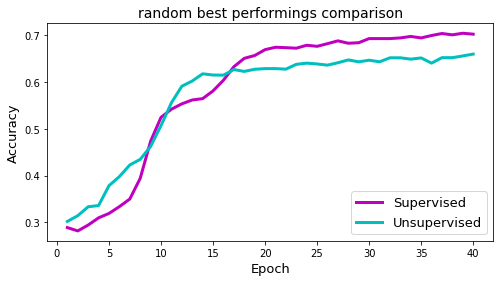

In [10]:
compare_models('random', 'listener', which_set, path_supervised, path_unsupervised, average_setting)


-----------------------------------
The most accurate 
Supervised random model is:

Best Seed:		 123 
Avearge Accuracy:	 0.23 
---
Lowest Accuracy:	 0.14 
Highest Accuracy:	 0.24 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised random model is:

Best Seed:		 89 
Avearge Accuracy:	 0.22 
---
Lowest Accuracy:	 0.14 
Highest Accuracy:	 0.23 
----------------------------------- 



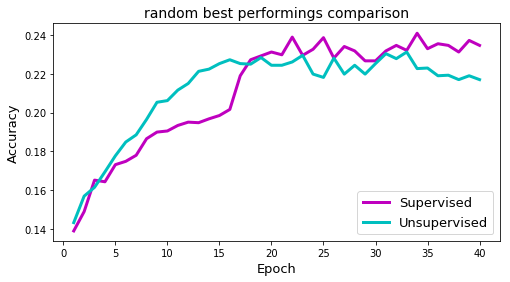

In [11]:
compare_models('random', 'speaker', which_set, path_supervised, path_unsupervised, 'w')

### Subjective Novelty <a name=sn></a>

#### Listener


-----------------------------------
The most accurate 
Supervised sn model is:

Best Seed:		 56 
Avearge Accuracy:	 0.49 
---
Lowest Accuracy:	 0.29 
Highest Accuracy:	 0.68 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised sn model is:

Best Seed:		 901 
Avearge Accuracy:	 0.29 
---
Lowest Accuracy:	 0.28 
Highest Accuracy:	 0.30 
----------------------------------- 



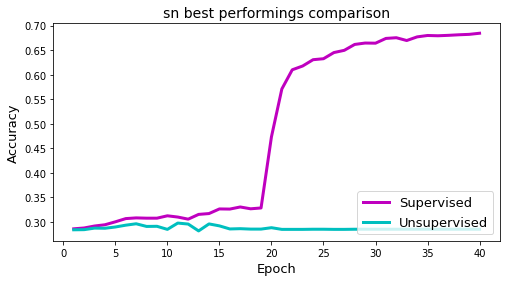

In [12]:
compare_models('sn', 'listener', which_set, path_supervised, path_unsupervised, average_setting)

#### Speaker


-----------------------------------
The most accurate 
Supervised sn model is:

Best Seed:		 56 
Avearge Accuracy:	 0.16 
---
Lowest Accuracy:	 0.11 
Highest Accuracy:	 0.20 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised sn model is:

Best Seed:		 56 
Avearge Accuracy:	 0.11 
---
Lowest Accuracy:	 0.09 
Highest Accuracy:	 0.14 
----------------------------------- 



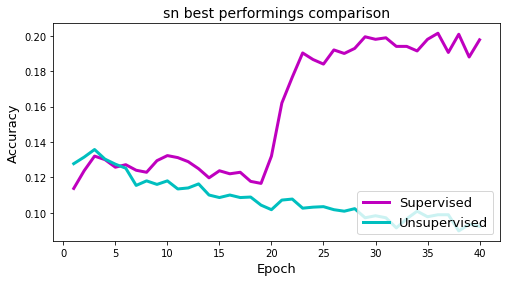

In [13]:
compare_models('sn', 'speaker', which_set, path_supervised, path_unsupervised, average_setting)

### Plasticity <a name="plasticity"></a>

#### Listener


-----------------------------------
The most accurate 
Supervised plasticity model is:

Best Seed:		 89 
Avearge Accuracy:	 0.41 
---
Lowest Accuracy:	 0.29 
Highest Accuracy:	 0.44 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised plasticity model is:

Best Seed:		 456 
Avearge Accuracy:	 0.65 
---
Lowest Accuracy:	 0.42 
Highest Accuracy:	 0.69 
----------------------------------- 



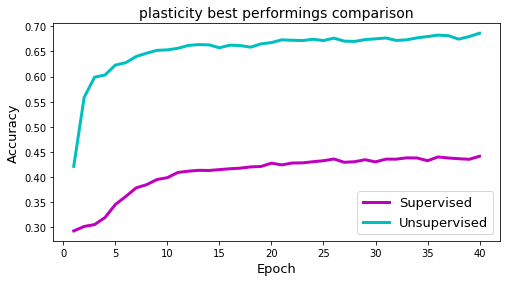

In [14]:
compare_models('plasticity', 'listener', which_set, path_supervised, path_unsupervised, average_setting)

#### Speaker


-----------------------------------
The most accurate 
Supervised plasticity model is:

Best Seed:		 89 
Avearge Accuracy:	 0.17 
---
Lowest Accuracy:	 0.13 
Highest Accuracy:	 0.18 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised plasticity model is:

Best Seed:		 456 
Avearge Accuracy:	 0.20 
---
Lowest Accuracy:	 0.12 
Highest Accuracy:	 0.22 
----------------------------------- 



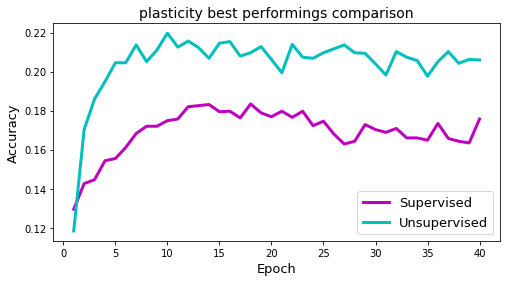

In [15]:
compare_models('plasticity', 'speaker', which_set, path_supervised, path_unsupervised, average_setting)

### Curious <a name="curious"></a>

#### Listener


-----------------------------------
The most accurate 
Supervised curious model is:

Best Seed:		 567 
Avearge Accuracy:	 0.72 
---
Lowest Accuracy:	 0.61 
Highest Accuracy:	 0.74 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised curious model is:

Best Seed:		 890 
Avearge Accuracy:	 0.66 
---
Lowest Accuracy:	 0.52 
Highest Accuracy:	 0.69 
----------------------------------- 



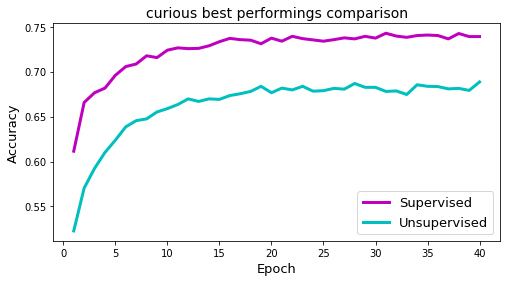

In [16]:
compare_models('curious', 'listener', which_set, path_supervised, path_unsupervised, average_setting)

#### Speaker


-----------------------------------
The most accurate 
Supervised curious model is:

Best Seed:		 89 
Avearge Accuracy:	 0.22 
---
Lowest Accuracy:	 0.16 
Highest Accuracy:	 0.24 
----------------------------------- 


-----------------------------------
The most accurate 
Unsupervised curious model is:

Best Seed:		 678 
Avearge Accuracy:	 0.22 
---
Lowest Accuracy:	 0.16 
Highest Accuracy:	 0.23 
----------------------------------- 



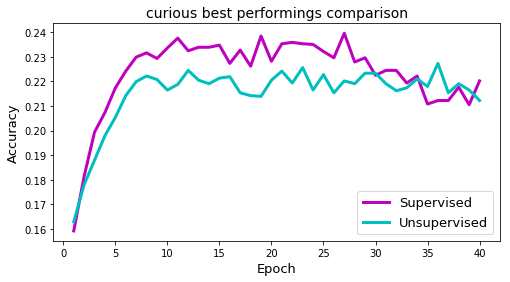

In [17]:
compare_models('curious', 'speaker', which_set, path_supervised, path_unsupervised, average_setting)